In [1]:
%pip install getdist corner fgivenx deap numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -e git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining simplemc from git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc
  Updating ./src/simplemc clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 4be227738f9015c11f48955740a7f9b06e14173d
  Attempting uninstall: simplemc
    Found existing installation: simplemc 0.9.8
    Can't uninstall 'simplemc'. No files were found to uninstall.
  Running setup.py develop for simplemc


To install permamently libraries in Google Colab, please see https://stackoverflow.com/questions/55253498/how-do-i-install-a-library-permanently-in-colab 

**Test that simplemc is successfully installed**

In [3]:
%cd /content/src/simplemc/
import simplemc

/content/src/simplemc
Initalizing nu density look up table... 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Done


**Import generic libraries**

In [4]:
import matplotlib.pyplot as plt
import numpy as np



# Cosmological calculator

Available functions in Cosmocalc:

- 'Hubble'
- 'DaOverrd'
- 'HIOverrd'
- 'DVOverrd'
- 'HubInvOverz'
- 'SNIa'
- 'fs8'
- 'Age' (without plot)

```
CosmoCalcmodel(model, funct=None, param=None, minparam=None,
               maxparam=None, nsteps=3, savepdf=False, zmax=3,
               plot_data=False)
```
If `param=None` the parameters values are the defaults included in `cosmo/paramDefs.py`. You can choose some parameter of the chosen model, and vary plot it using `minparam`, `maxparam` and `nsteps`.

## 1.1. Cosmic chronometers and Hubble function

In [5]:
from simplemc.CosmoCalc import CosmoCalc

LCDM


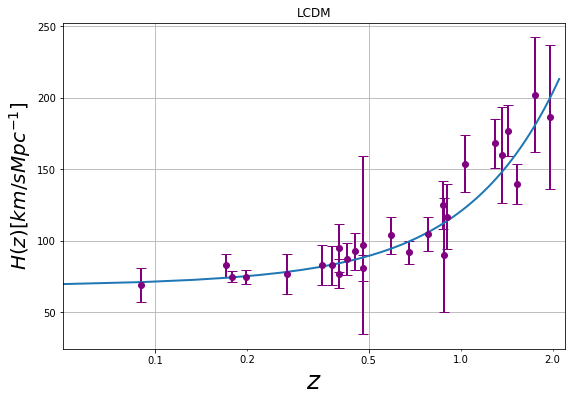

In [6]:
C = CosmoCalc('LCDM', funct='Hubble', plot_data=True, zmax=2.1)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_hubble.png', dpi=300)

## 1.2. Compute the age of the Universe, the $Da/r_d(z=2)$ and $f \sigma_8(z=2)$




In [7]:
C = CosmoCalc('LCDM', funct='Age')
C.Age(), C.DaOverrd(z=2), C.fs8(z=2)

LCDM
13.78Gys


(13.775572047446666, 25.392400314890214, 0.32184806231739976)

## 1.3. Distance modulus to LCDM and SNeIa datasets

LCDM


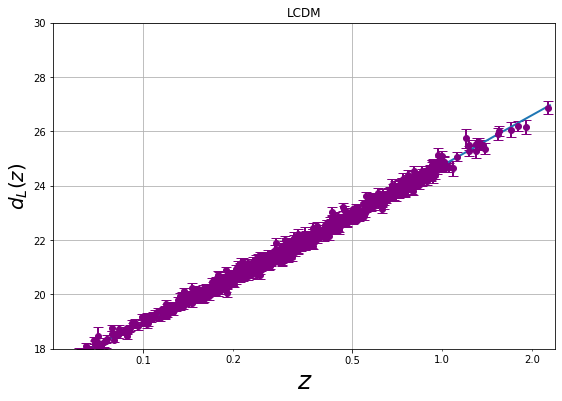

In [8]:
C = CosmoCalc('LCDM', funct='SNIa', plot_data=True, zmax=2.3)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_sn.png', dpi=300)

## 1.4 BAO data

Varying a model parameter.

LCDM


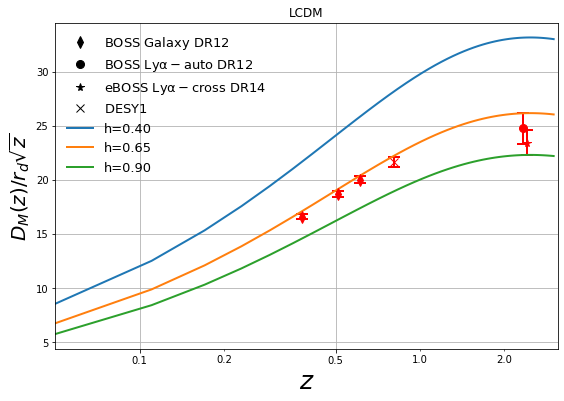

In [9]:
C = CosmoCalc('LCDM', funct='DaOverrd', param='h', minparam=0.4, maxparam=0.9, nsteps=3, plot_data=True)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_daoverrd.png', dpi=300)

## 1.5. $f \sigma_8$ measurements and $f \sigma_8(z)$ to CPL (owacdm) with several values to $w_a$

owaCDM


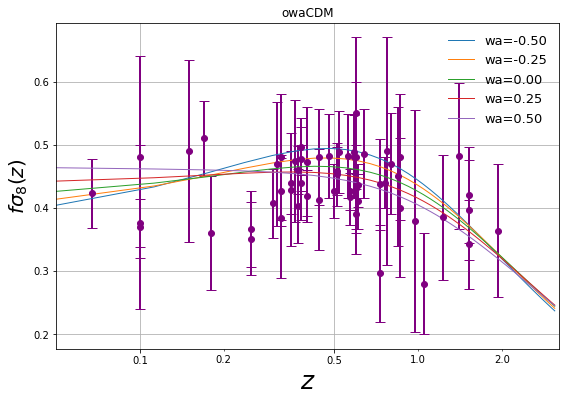

In [10]:
C = CosmoCalc('owaCDM', 'fs8', 'wa', -0.5, 0.5, 5, zmax=3.1, plot_data=True)
plot = C.run_plot(lw='1')
# plot.savefig('cosmocalc_fs8data.png', dpi=300)

# MLE with genetic algorithms

In [11]:
import matplotlib.pyplot as plt
from simplemc.DriverMC import DriverMC
from simplemc.plots.Plot_elipses import plot_elipses

In [12]:
analyzer1 = DriverMC(analyzername="ga_deap", model="LCDM", datasets="HD", chainsdir='simplemc/chains/')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [13]:
res1 = analyzer1.executer()

Minimizing... [0.3038, 0.02234, 0.6821] with bounds [(0.1, 0.5), (0.02, 0.025), (0.4, 0.9)]
gen	nevals	min    	avg   
0  	20    	9.34904	30.108
1  	16    	8.29556	20.8984
2  	14    	8.29556	25.031 
3  	16    	8.29556	21.0975
4  	16    	8.20547	16.5404
5  	17    	8.09436	16.6349
6  	14    	8.09436	15.3003
7  	17    	7.3422 	12.377 
8  	12    	7.33737	11.5643
9  	18    	7.29408	8.94296
10 	12    	7.29408	8.22988
11 	16    	7.29408	12.4521
12 	17    	7.29408	10.7496
13 	14    	7.29394	9.94689
14 	18    	7.28049	7.9385 
15 	13    	7.28049	14.9918
16 	16    	7.278  	11.7636
17 	16    	7.278  	9.8134 
18 	15    	7.27675	10.3429
19 	12    	7.27675	8.30349
20 	17    	7.26184	11.1742
21 	16    	7.26088	10.2024
22 	17    	7.26088	11.4275
23 	17    	7.26088	12.1569
24 	12    	7.26088	9.8698 
25 	16    	7.26088	9.86115
26 	16    	7.26088	10.4761
27 	16    	7.26088	9.07152
28 	13    	7.25682	9.4314 
29 	16    	7.25682	8.35468
30 	13    	7.25682	8.56773
31 	16    	7.25682	9.91993
32 	18    	7.25631	

INFO:simplemc:
Elapsed time: 0.238 minutes = 14.259 seconds


99 	10    	7.25173	9.3044 
100	15    	7.25173	7.88688
-- Best Fitness =  7.251726926891076
- Best solutions are:
-- Best Om =  0.3222912305509723
-- Best Obh2 =  0.022016648406663737
-- Best h =  0.6791045936128557
Hessian [[7.07996114e+02 0.00000000e+00 8.19428251e+02]
 [0.00000000e+00 4.72589792e+06 0.00000000e+00]
 [8.19428251e+02 0.00000000e+00 1.46730974e+03]] [1.84546091e+02+0.j 1.99075976e+03+0.j 4.72589792e+06+0.j]
Covariance matrix 
 [[ 3.99390836e-03 -0.00000000e+00 -2.23042298e-03]
 [ 0.00000000e+00  2.11600000e-07  0.00000000e+00]
 [-2.23042298e-03  0.00000000e+00  1.92711295e-03]]
Om: 0.3223 +/- 0.0632
Obh2: 0.0220 +/- 0.0005
h: 0.6791 +/- 0.0439

Information criterions:

	AIC: -8.5035


In [14]:
resx1 = res1['result']['param_fit']
cov1 = res1['result']['cov']

In [15]:
analyzer2 = DriverMC(analyzername="maxlike", model="LCDM", datasets="HD")

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [16]:
res2 = analyzer2.executer()

Minimizing... [0.3038, 0.02234, 0.6821] with bounds [(0.1, 0.5), (0.02, 0.025), (0.4, 0.9)]


INFO:simplemc:
Elapsed time: 0.007 minutes = 0.430 seconds


      fun: 7.24997951408073
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.12843110e-06, -4.14868140e-04,  6.30606675e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 68
      nit: 10
     njev: 17
   status: 0
  success: True
        x: array([0.31931955, 0.02201999, 0.68167758]) with Errors = False
Hessian [[7.18729527e+02 0.00000000e+00 8.21876273e+02]
 [0.00000000e+00 4.72589792e+06 0.00000000e+00]
 [8.21876273e+02 0.00000000e+00 1.46014125e+03]] [1.87823808e+02+0.j 1.99104697e+03+0.j 4.72589792e+06+0.j]
------
Done.
Optimal loglike :  7.24997951408073
Om = 0.3193195452714862 +/- 0.05
Obh2 = 0.022019994912207422 +/- 0.001
h = 0.681677580955738 +/- 0.05
------
Done.
Optimal loglike :  7.24997951408073
Om: 0.3193 +/- 0.0625
Obh2: 0.0220 +/- 0.0005
h: 0.6817 +/- 0.0438

Information criterions:

	AIC: -8.5000


In [17]:
resx2 = res2['result']['param_fit']
cov2 = res2['result']['cov']

-- vals, vecs --  [0.0054187  0.00050232] [[-0.84273059 -0.53833554]
 [ 0.53833554 -0.84273059]]
-- vals, vecs --  [0.00532414 0.00050225] [[-0.83998785 -0.54260521]
 [ 0.54260521 -0.83998785]]


(0.4, 1.1)

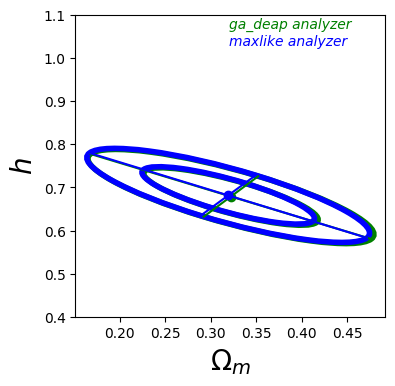

In [18]:
idx_param1 = 0
idx_param2 = 2

fig = plt.figure(figsize=(4,4), dpi=100)
ax1 = fig.add_subplot(111)
e1 = plot_elipses(resx1, cov1, idx_param1, idx_param2, ax=ax1, axis_sty = '-g', addtxt=[0.32, 1.07, 'ga_deap analyzer'])

e2 = plot_elipses(resx2, cov2, idx_param1, idx_param2, ax=ax1, 
             contour_col='b', axis_sty = '-b', addtxt=[0.32, 1.03, 'maxlike analyzer'])

plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$h$')
plt.ylim(0.4, 1.1)

# 3. Bayesian Inference

In [19]:
from simplemc.DriverMC import DriverMC
from simplemc.plots import Simple_Plots
from getdist import plots, MCSamples
import getdist

**MCMC**

In [20]:
analysis1 = DriverMC(analyzername='mcmc', model='LCDM', datasets='HD+SN')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [22]:
res1 = analysis1.executer(GRstop=0.01, nsamp=1000)

INFO:simplemc:
	nsamp: 1000
	skip: 300
	temp: 2
	mcevidence: False
	GRstop: 0.01


Hello, World! I am process 0 of 1 on 707afb1e8b7f
Bounds: [0.1  0.02 0.4 ] [0.5   0.025 0.9  ]
Starting chain...

Re-initializing covariance matrix after burn-in
[[ 7.13781708e-04 -5.61472971e-06 -7.15564351e-04]
 [-5.61472971e-06  1.96508148e-07  1.37641408e-05]
 [-7.15564351e-04  1.37641408e-05  2.21171826e-03]]

Number of steps achieved


INFO:simplemc:
Elapsed time: 2.613 minutes = 156.774 seconds



Covariance matrix saved in .covmat file
 [[ 7.95638674e-04  3.86206244e-07 -4.75576702e-04]
 [ 3.86206244e-07  1.91512201e-07 -1.23681128e-07]
 [-4.75576702e-04 -1.23681128e-07  9.79665078e-04]] 

simplemc/chains/LCDM_phy_HD+SN_mcmc_mcmc_1.txt
Removed no burn in

getdist cov
 [[ 7.92978445e-04  3.55269223e-07 -4.74199819e-04]
 [ 3.55269223e-07  1.90750420e-07 -1.02945924e-07]
 [-4.74199819e-04 -1.02945924e-07  9.74818145e-04]] 

Om: 0.3078 +/- 0.0282
Obh2: 0.0221 +/- 0.0004
h: 0.6872 +/- 0.0313

Information criterions:

	AIC: 53.9414


In [23]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]

In [24]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [25]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]


**Nested Sampling**

In [26]:
analysis2 = DriverMC(analyzername='nested', model='LCDM', datasets='HD+SN')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [27]:
res2 = analysis2.executer(nlivepoints=100)

INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 984 | ncall: 5108 | eff: 19.283 | logz: -29.1079 | dlogz: 0.0100 | loglstar: -23.9615 | point 0.2948536  0.02205582 0.7006339 

INFO:simplemc:
Elapsed time: 7.571 minutes = 454.285 seconds



Covariance matrix saved in .covmat file
 [[ 8.49884454e-04 -6.02784699e-07 -5.01073424e-04]
 [-6.02784699e-07  2.12866698e-07  5.83582710e-07]
 [-5.01073424e-04  5.83582710e-07  1.00736860e-03]] 

simplemc/chains/LCDM_phy_HD+SN_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 8.48096583e-04 -6.01519516e-07 -5.00019327e-04]
 [-6.01519516e-07  2.12419157e-07  5.82357247e-07]
 [-5.00019327e-04  5.82357247e-07  1.00524940e-03]] 

Om: 0.3074 +/- 0.0292
Obh2: 0.0220 +/- 0.0005
h: 0.6878 +/- 0.0317

Information criterions:

	AIC: 53.8251


In [28]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

**Plot with GetDist**

In [ ]:
# names = ["SN+BBAO", "SN+HD", "SN+HD+BBAO", "SN+HD+BBAO+Planck"]
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]
labels, np.shape(samples1)

In [30]:
samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='MCMC')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='Nested Sampling')

Removed no burn in
Removed no burn in


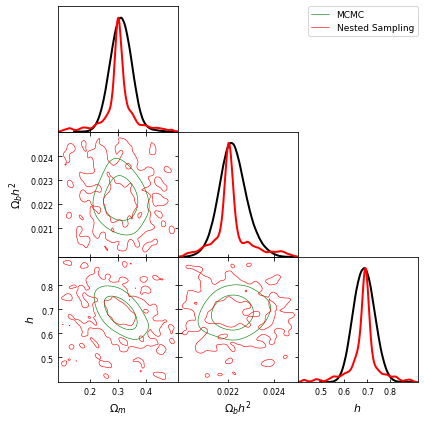

In [44]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2], filled=False, line_args={'lw':2},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.6},)

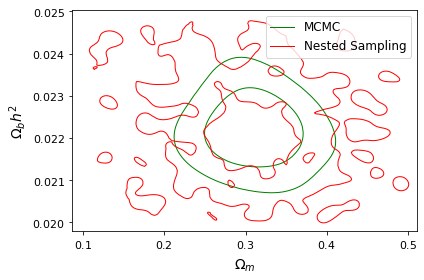

In [53]:

g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
g.settings.legend_fontsize = 12
g.plot_2d([samp1, samp2], labels[0], labels[1], filled=False, line_args={'lw':1},
          colors=['green', 'red'], smooth_s=0.8)

g.add_legend(['MCMC', 'Nested Sampling'], legend_loc='upper right');

# 4. Using a ini file

Excercise:

  - Explore the ``baseConfig.ini`` file.
  - Generate an ini file and run it with the ``DriverMC class``.

In [84]:
from simplemc.DriverMC import DriverMC

In [85]:
path_ini = "path_to_inifile"
inifile = "file.ini"

# analyzer = DriverMC(iniFile=path_ini+inifile)
# analyzer.executer()

# 5. Model comparison

Exercise: Add code from Docs: https://igomezv.github.io/SimpleMC/tuto_modelcomparison.html 

In [33]:
### Add code from Docs

# 6. Add new model

##6.1 Without cosmology

In [54]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
import numpy as np

<ErrorbarContainer object of 3 artists>

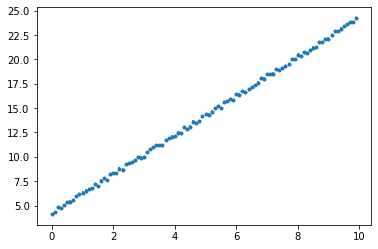

In [55]:
data = np.loadtxt('simplemc/data/line_data.txt')
err = np.loadtxt('simplemc/data/line_cov.txt')
plt.errorbar(data[:,0], data[:,1], yerr=np.diag(err), fmt='.')

In [56]:
def my_model(parameterlist, x):
    m, b = parameterlist
    return m*x+b

In [57]:
m = Parameter("m", 0, 0.05, (0, 10), "m_0")
b = Parameter("b", 3, 0.05, (0, 5), "b_0")

# create a list with your parameters objects
parameterlist = [m, b]

In [58]:
analyzer = DriverMC(model='simple', datasets='dline', analyzername='nested',
                    custom_parameters=parameterlist, custom_function=my_model)

res_custom = analyzer.executer(nlivepoints=1000)

INFO:simplemc:Loading /content/src/simplemc/simplemc/data/line_data.txt
INFO:simplemc:Free parameters and its bounds:
INFO:simplemc:m = 0 +/- 0.05
INFO:simplemc:b = 3 +/- 0.05
INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 1850 | ncall: 6701 | eff: 27.623 | logz: -301.6870 | dlogz: 0.0101 | loglstar: -287.8815 | point 2.00086924 4.33058307
Covariance matrix saved in .covmat file
 [[ 3.35492934e-06 -1.47561273e-05]
 [-1.47561273e-05  9.05275657e-05]] 

simplemc/chains/simple_phy_dline_nested_multi_1.txt


Removed no burn in


INFO:simplemc:
Elapsed time: 0.579 minutes = 34.728 seconds



getdist cov
 [[ 3.34668836e-06 -1.47198803e-05]
 [-1.47198803e-05  9.03051973e-05]] 

m: 2.0012 +/- 0.0018
b: 4.3292 +/- 0.0095

Information criterions:

	AIC: 579.7413


In [59]:
samples = res_custom['result']['samples']
weights = res_custom['result']['weights']
mpar = res_custom['result']['samples'][:,0]
bpar = res_custom['result']['samples'][:,1]




Removed no burn in


((0.005437729364214652, 9.879029820593393),
 (-0.017927200094235873, 5.018179975498061))

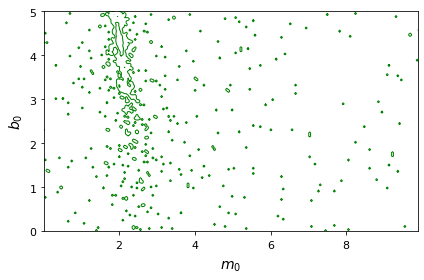

In [60]:
labels =  ['{}'.format(p.Ltxname) for p in analyzer.pars_info]
samp = MCSamples(samples=samples, names=labels, labels = labels)
g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
# g.settings.legend_fontsize = 12
g.plot_2d(samp, labels[0], labels[1], filled=False, line_args={'lw':1},
          colors=['green', 'red', 'indigo'], smooth=1)

## 6.2 Based on $\Lambda$CDM

- Review LCDMCosmology and BaseCosmology.

In [76]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC

In [77]:
Oextra = Parameter('Oextra', 0.1, 0.001, (0, 0.2), '\Omega_{extra}')

paramlist = [Oextra]

cosmo_model = 'Ocb/a**3+Omrad/a**4+NuContrib+(1.0-Om-Oextra)'

analyzer = DriverMC(model='simple_cosmo', datasets='SN', analyzername='mcmc',
                    custom_parameters=paramlist, custom_function=cosmo_model)

Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
Oextra = 0.1 +/- 0.001


In [78]:
res = analyzer.executer(nsamp=1000)

INFO:simplemc:
	nsamp: 1000
	skip: 300
	temp: 2
	mcevidence: False
	GRstop: 0.01


Hello, World! I am process 0 of 1 on 707afb1e8b7f
Bounds: [0.1  0.02 0.4  0.  ] [0.5   0.025 0.9   0.2  ]
Starting chain...

Re-initializing covariance matrix after burn-in
[[ 3.39041607e-04 -1.07210094e-06  2.93727206e-04 -4.74004359e-06]
 [-1.07210094e-06  1.02012011e-07 -3.68949203e-06 -6.15981655e-08]
 [ 2.93727206e-04 -3.68949203e-06  1.44986163e-03  7.65870101e-06]
 [-4.74004359e-06 -6.15981655e-08  7.65870101e-06  4.56745425e-07]]

Number of steps achieved


INFO:simplemc:
Elapsed time: 2.458 minutes = 147.482 seconds



Covariance matrix saved in .covmat file
 [[ 8.66116784e-04  9.74999676e-07 -6.71190411e-05 -2.88497373e-05]
 [ 9.74999676e-07  2.04835953e-07 -4.52511199e-06 -1.26679820e-07]
 [-6.71190411e-05 -4.52511199e-06  2.04923380e-02  5.75204656e-04]
 [-2.88497373e-05 -1.26679820e-07  5.75204656e-04  2.76379299e-05]] 

simplemc/chains/simple_cosmo_phy_SN_mcmc_1.txt
Removed no burn in

getdist cov
 [[ 8.63985795e-04  9.72280045e-07 -6.69442269e-05 -2.87801935e-05]
 [ 9.72280045e-07  2.04691835e-07 -4.52481963e-06 -1.24742243e-07]
 [-6.69442269e-05 -4.52481963e-06  2.04422387e-02  5.73740258e-04]
 [-2.87801935e-05 -1.24742243e-07  5.73740258e-04  2.75772649e-05]] 

Om: 0.2621 +/- 0.0294
Obh2: 0.0221 +/- 0.0005
h: 0.6931 +/- 0.1432
Oextra: 0.0961 +/- 0.0053

Information criterions:

	AIC: 41.2140


In [79]:
samples = res['result']['samples']
weights = res['result']['weights']

In [80]:
labels =  ['{}'.format(p.Ltxname) for p in analyzer.pars_info]
labels, np.shape(samples1)

(['\\Omega_m', '\\Omega_{b}h^2', 'h', '\\Omega_{extra}'], (700, 3))

In [81]:
samp = MCSamples(samples=samples, names=labels, labels = labels)


Removed no burn in


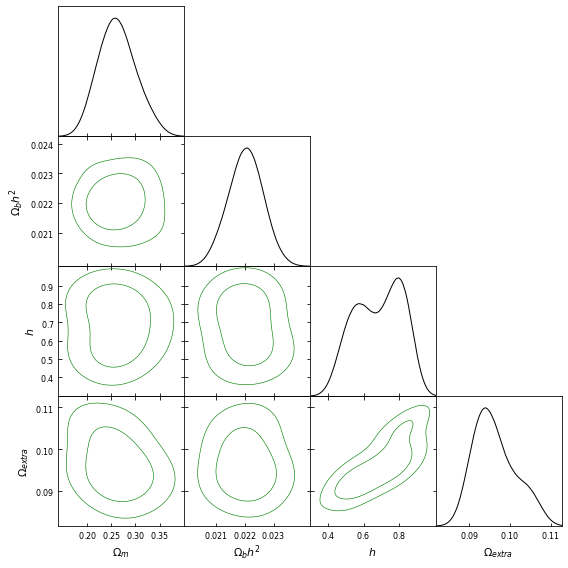

In [83]:
g = plots.get_subplot_plotter()
g.triangle_plot([samp], filled=False, line_args={'lw':1},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.6},)